In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_excel('Sales Chart.xlsx')
FB_ad = pd.read_excel('FB ad.xlsx')
G_ad = pd.read_csv('Google ad report.csv',thousands=',')
#import the charts into notebook

In [183]:
FB_ad['Week']= FB_ad['Week'].str[:10]
FB_ad

,Week,Campaign Name,Delivery Status,Delivery Level,Amount Spent (USD),Reach,"Cost per 1,000 People Reached",Impressions,Frequency,Link Clicks,...,View Cart,Cost per View Cart,Website Purchases,Website Purchases Conversion Value,Cost per Purchase,Checkouts Initiated,Cost per Checkout Initiated,Reporting Starts,Reporting Ends,week
44,2019-04-01,Collection A Conversion,active,campaign,16801.20,992028,16.936216,2373024,2.392094,23322,...,2178,7.714050,408.0,224863.92,41.179412,834,20.145324,2019-04-01,2019-04-07,2019-04-01
74,2019-04-01,Collection C Conversion,active,campaign,1470.66,83400,17.633813,158760,1.903597,2076,...,66,22.282727,30.0,3899.70,49.022000,132,11.141364,2019-04-01,2019-04-07,2019-04-01
59,2019-04-01,Collection A Traffic,active,campaign,11521.98,1559382,7.388812,2143680,1.374698,46092,...,288,40.006875,24.0,22799.46,480.082500,102,112.960588,2019-04-01,2019-04-07,2019-04-01
29,2019-04-01,Collection B Traffic,active,campaign,6855.24,534204,12.832626,881154,1.649471,15042,...,102,67.208235,6.0,5519.88,1142.540000,18,380.846667,2019-04-01,2019-04-07,2019-04-01
14,2019-04-01,Collection B Conversion,active,campaign,7263.54,554466,13.100064,928410,1.674422,11874,...,486,14.945556,18.0,9959.58,403.530000,132,55.026818,2019-04-01,2019-04-07,2019-04-01
89,2019-04-01,Collection C Traffic,active,campaign,4198.38,637998,6.580554,775122,1.214929,12618,...,78,53.825385,12.0,1139.88,349.865000,120,34.986500,2019-04-01,2019-04-07,2019-04-01
28,2019-04-08,Collection B Traffic,active,campaign,8349.90,809430,10.315778,1313370,1.622586,43530,...,306,27.287255,NaN,NaN,NaN,36,231.941667,2019-04-08,2019-04-14,2019-04-08
73,2019-04-08,Collection C Conversion,active,campaign,1427.16,62886,22.694399,124068,1.972903,1932,...,60,23.786000,48.0,6035.58,29.732500,96,14.866250,2019-04-08,2019-04-14,2019-04-08
43,2019-04-08,Collection A Conversion,active,campaign,16785.36,931338,18.022845,2142054,2.299975,17358,...,2226,7.540593,216.0,132146.10,77.710000,666,25.203243,2019-04-08,2019-04-14,2019-04-08
88,2019-04-08,Collection C Traffic,active,campaign,4198.80,600534,6.991777,727992,1.212241,11376,...,36,116.633333,24.0,2579.76,174.950000,72,58.316667,2019-04-08,2019-04-14,2019-04-08


### First get the sales data of the last week

In [4]:
sales.sort_values(by = 'Week Start', inplace = True)
sales.tail(1) #double click the chart to hide it
pie_1 = sales.tail(1)[['Collection A Sales','Collection B Sales','Collection C Sales','Remaining Sales']]
pie_1 = pie_1.transpose()
pie_1

,14
Collection A Sales,145745.866667
Collection B Sales,49748.640000
Collection C Sales,39776.940000
Remaining Sales,15527.000000


#### A pie chart for sales of collections

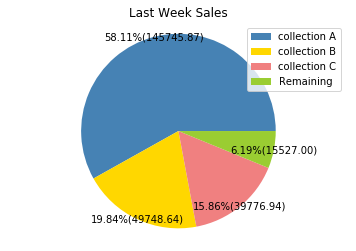

In [5]:
X = pie_1[14]
labels = ['collection A','collection B','collection C','Remaining']
colors = ['steelblue','gold','lightcoral','yellowgreen']
plt.close()
#fig = plt.figure()
plt.pie(X,colors=colors, pctdistance=1,labeldistance=0.8,
       autopct=lambda p:'{:.2f}%({:.2f})'.format(p,(p/100)*X.sum()))
plt.title('Last Week Sales')
plt.axis('equal')
plt.legend(labels, loc='best')
plt.savefig('Sales Snapshot.jpg')
plt.show()
plt.close()

### Cost of last week

In [185]:
cost_FB = FB_ad.groupby(['Week'])['Amount Spent (USD)'].sum()
cost_FB_lw = cost_FB.tail(1)
cost_FB_lw = pd.DataFrame(cost_FB_lw)
cost_FB_lw

,Amount Spent (USD)
Week,
2019-07-08,47601.6


In [186]:
cost_G = G_ad.groupby(['Week'])['Cost'].sum()
cost_G_lw = cost_G.tail(1)
cost_G_lw = pd.DataFrame(cost_G_lw)
cost_G_lw

,Cost
Week,
7/8/2019,18469.54


In [187]:
cost_FB_ad = FB_ad.groupby(['Week','Campaign Name'])['Amount Spent (USD)'].sum()
cost_FB_ad_lw = cost_FB_ad.tail(6)
cost_FB_ad_lw = pd.DataFrame(cost_FB_ad_lw)
cost_FB_ad_lw.reset_index('Campaign Name')
cost_FB_ad_lw

Amount Spent (USD)
Week       Campaign Name                              
2019-07-08 Collection A Conversion            11509.56
           Collection A Traffic               20180.70
           Collection B Conversion             1932.66
           Collection B Traffic                4612.14
           Collection C Conversion             2591.58
           Collection C Traffic                6774.96

In [188]:
cost_FB_A_lw = cost_FB_ad_lw['Amount Spent (USD)'][0] + cost_FB_ad_lw['Amount Spent (USD)'][1]
cost_FB_B_lw = cost_FB_ad_lw['Amount Spent (USD)'][2] + cost_FB_ad_lw['Amount Spent (USD)'][3]
cost_FB_C_lw = cost_FB_ad_lw['Amount Spent (USD)'][4] + cost_FB_ad_lw['Amount Spent (USD)'][5]
cost_FB_remaining_lw = cost_FB_lw['Amount Spent (USD)'][0] - cost_FB_A_lw - cost_FB_B_lw - cost_FB_C_lw

In [189]:
cost_FB_ads = pd.DataFrame()
cost_FB_ads = cost_FB_ads.append({'Campaign Name':'Collection A','Amount Spent (USD)':cost_FB_A_lw },
                     ignore_index=True)
cost_FB_ads = cost_FB_ads.append({'Campaign Name':'Collection B','Amount Spent (USD)':cost_FB_B_lw },
                     ignore_index=True)
cost_FB_ads = cost_FB_ads.append({'Campaign Name':'Collection C','Amount Spent (USD)':cost_FB_C_lw },
                     ignore_index=True)
cost_FB_ads = cost_FB_ads.append({'Campaign Name':'Remaining','Amount Spent (USD)':cost_FB_remaining_lw },
                     ignore_index=True)
cost_FB_ads

,Amount Spent (USD),Campaign Name
0,3.169026e+04,Collection A
1,6.544800e+03,Collection B
2,9.366540e+03,Collection C
3,3.637979e-12,Remaining


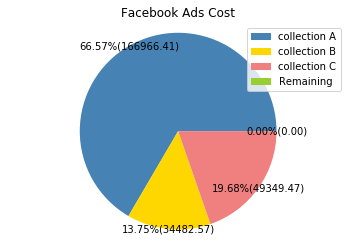

In [126]:
FB_ad_pie = cost_FB_ads['Amount Spent (USD)']
labels = ['collection A','collection B','collection C','Remaining']
colors = ['steelblue','gold','lightcoral','yellowgreen']
plt.close()
#fig = plt.figure()
plt.pie(X,colors=colors, pctdistance=1,labeldistance=0.8,
       autopct=lambda p:'{:.2f}%({:.2f})'.format(p,(p/100)*X.sum()))
plt.title('Facebook Ads Cost')
plt.axis('equal')
plt.legend(labels, loc='best')
plt.savefig('Facebook Ads Cost.jpg')
plt.show()
plt.close()

### Start to analyze the Facebood Ad report

In [211]:
FB_ad.sort_values(by = "Week", inplace=True) # sort out the table by time
FB_ad #double click the chart to hide it

,Week,Campaign Name,Delivery Status,Delivery Level,Amount Spent (USD),Reach,"Cost per 1,000 People Reached",Impressions,Frequency,Link Clicks,...,View Cart,Cost per View Cart,Website Purchases,Website Purchases Conversion Value,Cost per Purchase,Checkouts Initiated,Cost per Checkout Initiated,Reporting Starts,Reporting Ends,week
44,2019-04-01,Collection A Conversion,active,campaign,16801.20,992028,16.936216,2373024,2.392094,23322,...,2178,7.714050,408.0,224863.92,41.179412,834,20.145324,2019-04-01,2019-04-07,2019-04-01
74,2019-04-01,Collection C Conversion,active,campaign,1470.66,83400,17.633813,158760,1.903597,2076,...,66,22.282727,30.0,3899.70,49.022000,132,11.141364,2019-04-01,2019-04-07,2019-04-01
59,2019-04-01,Collection A Traffic,active,campaign,11521.98,1559382,7.388812,2143680,1.374698,46092,...,288,40.006875,24.0,22799.46,480.082500,102,112.960588,2019-04-01,2019-04-07,2019-04-01
29,2019-04-01,Collection B Traffic,active,campaign,6855.24,534204,12.832626,881154,1.649471,15042,...,102,67.208235,6.0,5519.88,1142.540000,18,380.846667,2019-04-01,2019-04-07,2019-04-01
14,2019-04-01,Collection B Conversion,active,campaign,7263.54,554466,13.100064,928410,1.674422,11874,...,486,14.945556,18.0,9959.58,403.530000,132,55.026818,2019-04-01,2019-04-07,2019-04-01
89,2019-04-01,Collection C Traffic,active,campaign,4198.38,637998,6.580554,775122,1.214929,12618,...,78,53.825385,12.0,1139.88,349.865000,120,34.986500,2019-04-01,2019-04-07,2019-04-01
43,2019-04-08,Collection A Conversion,active,campaign,16785.36,931338,18.022845,2142054,2.299975,17358,...,2226,7.540593,216.0,132146.10,77.710000,666,25.203243,2019-04-08,2019-04-14,2019-04-08
28,2019-04-08,Collection B Traffic,active,campaign,8349.90,809430,10.315778,1313370,1.622586,43530,...,306,27.287255,NaN,NaN,NaN,36,231.941667,2019-04-08,2019-04-14,2019-04-08
73,2019-04-08,Collection C Conversion,active,campaign,1427.16,62886,22.694399,124068,1.972903,1932,...,60,23.786000,48.0,6035.58,29.732500,96,14.866250,2019-04-08,2019-04-14,2019-04-08
13,2019-04-08,Collection B Conversion,active,campaign,8735.22,462696,18.878962,945606,2.043687,18990,...,576,15.165313,18.0,6749.64,485.290000,204,42.819706,2019-04-08,2019-04-14,2019-04-08


In [199]:
FB_ad_last_week = FB_ad.tail(6)

#### get the last week's ROI

In [191]:
FB_total_1 = FB_ad.groupby(['Week'])['Amount Spent (USD)','Website Purchases Conversion Value'].sum()
FB_total_1['FB ROI'] = FB_total_1['Website Purchases Conversion Value']/FB_total_1['Amount Spent (USD)']
FB_total_1.tail(1)

,Amount Spent (USD),Website Purchases Conversion Value,FB ROI
Week,,,
2019-07-08,47601.6,59068.14,1.240886


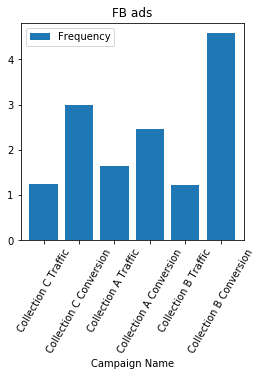

In [273]:
#ax = plt.gca()
plt.close()
FB_ad_last_week.plot(kind='bar',x='Campaign Name',
                     y=['Frequency'],
                     width=0.8,figsize=(4,4),
                     rot=60,title='FB ads')

plt.savefig('FB frequency.jpg',bbox_inches='tight')
plt.show()
plt.close()

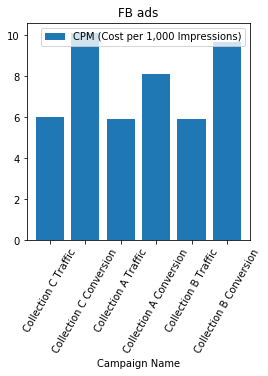

In [274]:
#ax = plt.gca()
FB_ad_last_week.plot(kind='bar',x='Campaign Name',
                     y=['CPM (Cost per 1,000 Impressions)'],
                     width=0.8,figsize=(4,4),
                     rot=60,title='FB ads')

plt.savefig('FB CPM.jpg',bbox_inches='tight')
plt.show()
plt.close()

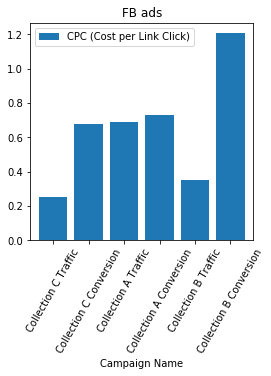

In [275]:
FB_ad_last_week.plot(kind='bar',x='Campaign Name',y='CPC (Cost per Link Click)',width=0.8,figsize=(4,4),
                     rot=60,title='FB ads')

plt.savefig('FB CPC.jpg',bbox_inches='tight')
plt.show()
plt.close()

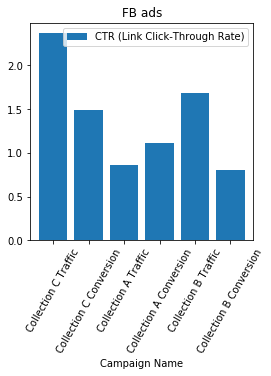

In [276]:
FB_ad_last_week.plot(kind='bar',x='Campaign Name',y='CTR (Link Click-Through Rate)',width=0.8,figsize=(4,4),
                     rot=60, title='FB ads')

plt.savefig('FB CTR.jpg',bbox_inches='tight')
plt.show()
plt.close()

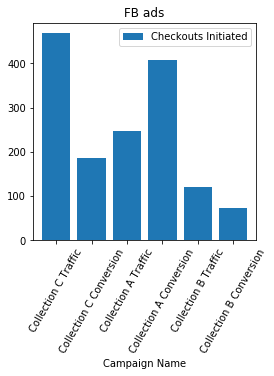

In [277]:
FB_ad_last_week.plot(kind='bar',x='Campaign Name',y='Checkouts Initiated',width=0.8,figsize=(4,4),
                     rot=60, title='FB ads')

plt.savefig('FB Checkouts.jpg',bbox_inches='tight')
plt.show()
plt.close()

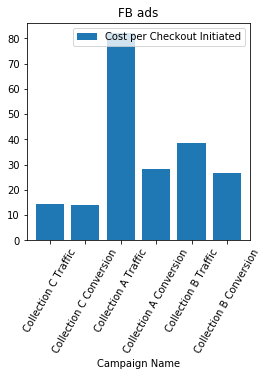

In [278]:
FB_ad_last_week.plot(kind='bar',x='Campaign Name',y='Cost per Checkout Initiated',width=0.8,figsize=(4,4),
                     rot=60, title='FB ads')

plt.savefig('FB checkouts cost.jpg',bbox_inches='tight')
plt.show()
plt.close()

#### weekly performance of FB ads

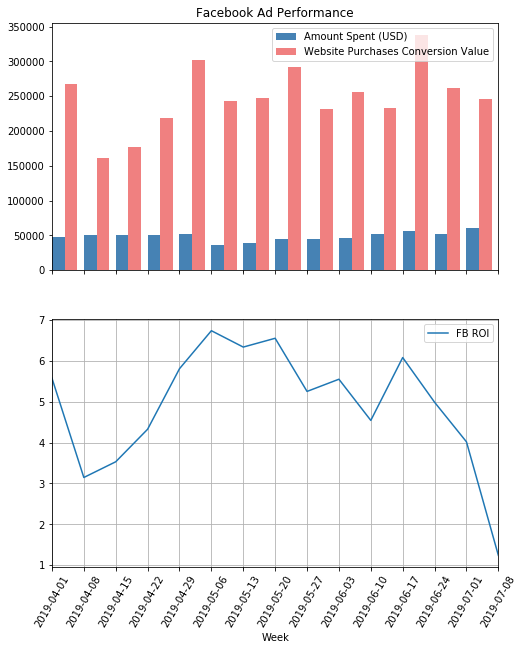

In [192]:
plt.close()
fig, ax = plt.subplots(2,sharex=True)
FB_total_1.plot(kind='bar',y=['Amount Spent (USD)','Website Purchases Conversion Value'],color=['steelblue','lightcoral'],
                ax=ax[0],position=0,width=0.8,figsize=(8,10),title='Facebook Ad Performance')
#FB_total_1.plot(kind='bar',y='Website Purchases Conversion Value',ax=ax[1])
FB_total_1.plot(kind='line',y= 'FB ROI',ax=ax[1],rot=60,grid='on')
#plt.suptitle('Facebook Ad Performance')
plt.savefig('FB Ad Performance.jpg')
plt.show()
plt.close()

In [193]:
FB_ad_cost = FB_ad.groupby(['Week','Campaign Name'])['Amount Spent (USD)', 'Website Purchases Conversion Value'].sum()
FB_ad_cost = pd.DataFrame(FB_ad_cost)
FB_ad_cost['ROI'] = FB_ad_cost['Website Purchases Conversion Value'] / FB_ad_cost['Amount Spent (USD)']
FB_ad_last_week = FB_ad_cost.rename(columns={'Website Purchases Conversion Value':'Conversion Value','Amount Spent (USD)':'Cost'})
FB_ad_last_week = FB_ad_last_week[['Cost','ROI']]
FB_ad_last_week.tail(6)

Cost       ROI
Week       Campaign Name                              
2019-07-08 Collection A Conversion  11509.56  3.005729
           Collection A Traffic     20180.70  0.591645
           Collection B Conversion   1932.66  1.511875
           Collection B Traffic      4612.14  1.077157
           Collection C Conversion   2591.58  0.571829
           Collection C Traffic      6774.96  0.466692

#### find the ROIs of campaign Collection A Traffic

In [10]:
FB_ad_A_traffic = FB_ad[FB_ad['Campaign Name']=='Collection A Traffic'].groupby(['Week','Campaign Name'])['Amount Spent (USD)', 'Website Purchases Conversion Value'].sum()
FB_ad_A_traffic['ROI']=FB_ad_A_traffic['Website Purchases Conversion Value']/FB_ad_A_traffic['Amount Spent (USD)']
FB_ad_A_traffic = FB_ad_A_traffic.rename(columns={'ROI':'Collection A Traffic ROI'})
FB_ad_A_traffic.tail(1)

,,Amount Spent (USD),Website Purchases Conversion Value,Collection A Traffic ROI
Week,Campaign Name,,,
2019-07-08 - 2019-07-12,Collection A Traffic,20180.7,11939.82,0.591645


#### find the ROIs of campaign Collection A conversion

In [11]:
FB_ad_A_conversion = FB_ad[FB_ad['Campaign Name']=='Collection A Conversion'].groupby(['Week','Campaign Name'])['Amount Spent (USD)', 'Website Purchases Conversion Value'].sum()
FB_ad_A_conversion['ROI']=FB_ad_A_conversion['Website Purchases Conversion Value']/FB_ad_A_conversion['Amount Spent (USD)']
FB_ad_A_conversion = FB_ad_A_conversion.rename(columns={'ROI':'Collection A Conversion ROI'})
FB_ad_A_conversion.tail()

,,Amount Spent (USD),Website Purchases Conversion Value,Collection A Conversion ROI
Week,Campaign Name,,,
2019-06-10 - 2019-06-16,Collection A Conversion,16128.36,182335.14,11.305250
2019-06-17 - 2019-06-23,Collection A Conversion,18976.98,268516.32,14.149581
2019-06-24 - 2019-06-30,Collection A Conversion,12932.34,179346.42,13.868056
2019-07-01 - 2019-07-07,Collection A Conversion,13250.34,181515.00,13.698894
2019-07-08 - 2019-07-12,Collection A Conversion,11509.56,34594.62,3.005729


In [12]:
#create chart for collection A from FB ad
options = ['Collection A Traffic','Collection A Conversion']
FB_ad_A = FB_ad[FB_ad['Campaign Name'].isin(options)]
FB_ad_A.tail(1)

,Week,Campaign Name,Delivery Status,Delivery Level,Amount Spent (USD),Reach,"Cost per 1,000 People Reached",Impressions,Frequency,Link Clicks,...,Website Adds to Cart Conversion Value,View Cart,Cost per View Cart,Website Purchases,Website Purchases Conversion Value,Cost per Purchase,Checkouts Initiated,Cost per Checkout Initiated,Reporting Starts,Reporting Ends
30,2019-07-08 - 2019-07-12,Collection A Conversion,active,campaign,11509.56,574842,20.022128,1418340,2.467356,15738,...,1066203.66,1176,9.787041,84.0,34594.62,137.018571,408,28.209706,2019-07-08,2019-07-12


#### total ROI of collection A in FB

In [16]:
FB_ad_A_total = FB_ad_A[['Week','Amount Spent (USD)', 'Website Purchases Conversion Value']].groupby(['Week']).sum()
FB_ad_A_total['ROI Collection A'] = FB_ad_A_total['Website Purchases Conversion Value']/FB_ad_A_total['Amount Spent (USD)']
FB_ad_A_total = FB_ad_A_total.rename(columns={'ROI Collection A':'Collection A Total ROI'})
FB_ad_A_total.tail(1)

,Amount Spent (USD),Website Purchases Conversion Value,Collection A Total ROI
Week,,,
2019-07-08 - 2019-07-12,31690.26,46534.44,1.468415


#### Chart analysis of ROI on Collection A in Facebook

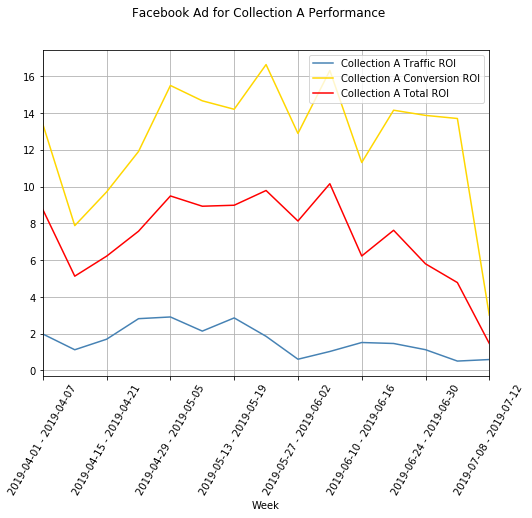

In [17]:
plt.close()
ax = plt.gca()
FB_ad_A_traffic.plot(kind='line',y='Collection A Traffic ROI',color='steelblue',ax=ax,figsize=(8,6))
FB_ad_A_conversion.plot(kind='line',y='Collection A Conversion ROI',color='gold',ax=ax)
FB_ad_A_total.plot(kind='line',y= 'Collection A Total ROI',color='red',ax=ax,rot=60)
plt.suptitle('Facebook Ad for Collection A Performance')
ax.grid('on', which='both', axis='x')
ax.grid('on', which='both', axis='y')
plt.savefig('FB Ad for Collection A Performance.jpg')
plt.show()
plt.close()

### Same analysis on Collection B 

#### trafic campaign

In [18]:
FB_ad_B_traffic = FB_ad[FB_ad['Campaign Name']=='Collection B Traffic'].groupby(['Week','Campaign Name'])['Amount Spent (USD)', 'Website Purchases Conversion Value'].sum()
FB_ad_B_traffic['ROI']=FB_ad_B_traffic['Website Purchases Conversion Value']/FB_ad_B_traffic['Amount Spent (USD)']
FB_ad_B_traffic = FB_ad_B_traffic.rename(columns={'ROI':'Collection B Traffic ROI'})
FB_ad_B_traffic.tail(1)

,,Amount Spent (USD),Website Purchases Conversion Value,Collection B Traffic ROI
Week,Campaign Name,,,
2019-07-08 - 2019-07-12,Collection B Traffic,4612.14,4968.0,1.077157


#### conversion campaign

In [19]:
FB_ad_B_conversion = FB_ad[FB_ad['Campaign Name']=='Collection B Conversion'].groupby(['Week','Campaign Name'])['Amount Spent (USD)', 'Website Purchases Conversion Value'].sum()
FB_ad_B_conversion['ROI']=FB_ad_B_conversion['Website Purchases Conversion Value']/FB_ad_B_conversion['Amount Spent (USD)']
FB_ad_B_conversion = FB_ad_B_conversion.rename(columns={'ROI':'Collection B Conversion ROI'})
FB_ad_B_conversion.tail(1)

,,Amount Spent (USD),Website Purchases Conversion Value,Collection B Conversion ROI
Week,Campaign Name,,,
2019-07-08 - 2019-07-12,Collection B Conversion,1932.66,2921.94,1.511875


#### total ROI

In [20]:
options = ['Collection B Traffic','Collection B Conversion']
FB_ad_B = FB_ad[FB_ad['Campaign Name'].isin(options)]
FB_ad_B = FB_ad_B[['Week','Amount Spent (USD)', 'Website Purchases Conversion Value']]
FB_ad_B.tail(1)

,Week,Amount Spent (USD),Website Purchases Conversion Value
0,2019-07-08 - 2019-07-12,1932.66,2921.94


In [30]:
FB_ad_B_total = FB_ad_B.groupby(['Week']).sum()
FB_ad_B_total['ROI Collection B'] = FB_ad_B_total['Website Purchases Conversion Value']/FB_ad_B_total['Amount Spent (USD)']
FB_ad_B_total = FB_ad_B_total.rename(columns={'ROI Collection B':'Collection B Total ROI'})
FB_ad_B_total.tail(1)

,Amount Spent (USD),Website Purchases Conversion Value,Collection B Total ROI
Week,,,
2019-07-08 - 2019-07-12,6544.8,7889.94,1.205528


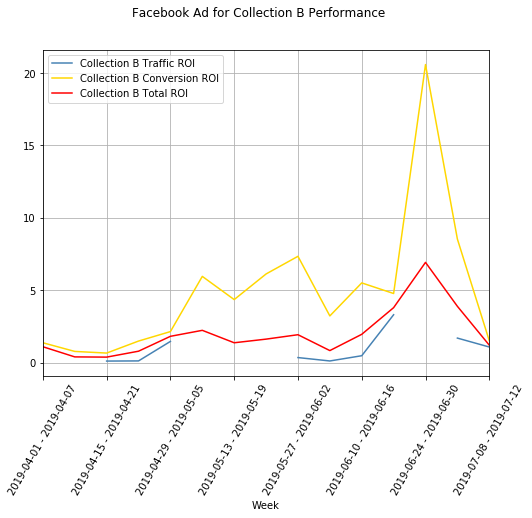

In [31]:
#chart for collection B on FB
ax = plt.gca()
FB_ad_B_traffic.plot(kind='line',y='Collection B Traffic ROI',color='steelblue',ax=ax,figsize=(8,6))
FB_ad_B_conversion.plot(kind='line',y='Collection B Conversion ROI',color='gold',ax=ax)
FB_ad_B_total.plot(kind='line',y= 'Collection B Total ROI',color='red',ax=ax,rot=60)
plt.suptitle('Facebook Ad for Collection B Performance')
ax.grid('on', which='both', axis='x')
ax.grid('on', which='both', axis='y')
plt.savefig('FB Ad for Collection B Performance.jpg')
plt.show()
plt.close()

### Same analysis on Collection C

In [22]:
FB_ad_C_traffic = FB_ad[FB_ad['Campaign Name']=='Collection C Traffic'].groupby(['Week','Campaign Name'])['Amount Spent (USD)', 'Website Purchases Conversion Value'].sum()
FB_ad_C_traffic['ROI']=FB_ad_C_traffic['Website Purchases Conversion Value']/FB_ad_C_traffic['Amount Spent (USD)']
FB_ad_C_traffic = FB_ad_C_traffic.rename(columns={'ROI':'Collection C Traffic ROI'})
FB_ad_C_traffic.tail(1)

,,Amount Spent (USD),Website Purchases Conversion Value,Collection C Traffic ROI
Week,Campaign Name,,,
2019-07-08 - 2019-07-12,Collection C Traffic,6774.96,3161.82,0.466692


In [23]:
FB_ad_C_conversion = FB_ad[FB_ad['Campaign Name']=='Collection C Conversion'].groupby(['Week','Campaign Name'])['Amount Spent (USD)', 'Website Purchases Conversion Value'].sum()
FB_ad_C_conversion['ROI']=FB_ad_C_conversion['Website Purchases Conversion Value']/FB_ad_C_conversion['Amount Spent (USD)']
FB_ad_C_conversion = FB_ad_C_conversion.rename(columns={'ROI':'Collection C Conversion ROI'})
FB_ad_C_conversion.tail(1)

,,Amount Spent (USD),Website Purchases Conversion Value,Collection C Conversion ROI
Week,Campaign Name,,,
2019-07-08 - 2019-07-12,Collection C Conversion,2591.58,1481.94,0.571829


In [24]:
options = ['Collection C Traffic','Collection C Conversion']
FB_ad_C = FB_ad[FB_ad['Campaign Name'].isin(options)]
FB_ad_C = FB_ad_C[['Week','Amount Spent (USD)', 'Website Purchases Conversion Value']]
FB_ad_C.tail(1)

,Week,Amount Spent (USD),Website Purchases Conversion Value
60,2019-07-08 - 2019-07-12,2591.58,1481.94


In [27]:
FB_ad_C_total = FB_ad_C.groupby(['Week']).sum()
FB_ad_C_total['ROI Collection C'] = FB_ad_C_total['Website Purchases Conversion Value']/FB_ad_C_total['Amount Spent (USD)']
FB_ad_C_total = FB_ad_C_total.rename(columns={'ROI Collection C':'Collection C Total ROI'})
FB_ad_C_total.tail(1)

,Amount Spent (USD),Website Purchases Conversion Value,Collection C Total ROI
Week,,,
2019-07-08 - 2019-07-12,9366.54,4643.76,0.495782


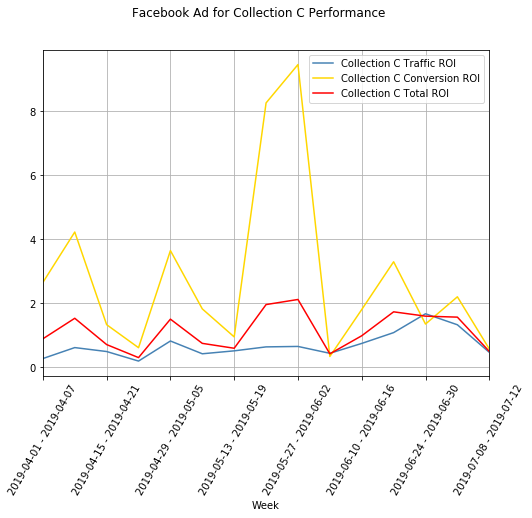

In [29]:
ax = plt.gca()
FB_ad_C_traffic.plot(kind='line',y='Collection C Traffic ROI',color='steelblue',ax=ax,figsize=(8,6))
FB_ad_C_conversion.plot(kind='line',y='Collection C Conversion ROI',color='gold',ax=ax)
FB_ad_C_total.plot(kind='line',y= 'Collection C Total ROI',color='red',ax=ax,rot=60)
plt.suptitle('Facebook Ad for Collection C Performance')
ax.grid('on', which='both', axis='x')
ax.grid('on', which='both', axis='y')
plt.savefig('FB Ad for Collection C Performance.jpg')
plt.show()
plt.close()

## Now start to analyze Google Ad report

In [251]:
#sort table by time sequence
G_ad = pd.read_csv('Google ad report.csv',thousands=',')
G_ad.sort_values(by = 'Week', inplace = True)
G_ad['Interaction rate'] = G_ad['Interaction rate'].str.strip('%').replace(' --','0')
G_ad['Conv. rate'] = G_ad['Conv. rate'].str.strip('%').replace(' --','0')
G_ad['Avg. CPC'] = G_ad['Avg. CPC'].str.replace(' --','0')
#G_ad['Interaction rate'] = G_ad['Interaction rate'].astype(float)
#G_ad['Conv. rate'] = G_ad['Conv. rate'].astype(float)
#G_ad.dtypes

In [252]:
G_ad['Interaction rate'] = G_ad['Interaction rate'].astype(float)
G_ad['Conv. rate'] = G_ad['Conv. rate'].astype(float)
#G_ad #double click the left blank to hide it

In [253]:
G_ad['Interaction rate'] = G_ad['Interaction rate']/100
G_ad['Conv. rate'] = G_ad['Conv. rate']/100

In [254]:
G_ad = G_ad.astype({'Impr.':float,'Interactions':int,'Conv. value':float,'Avg. CPC':float})
G_ad.dtypes

Week                                object
Campaign status                     object
Campaign                            object
Currency code                       object
Budget                               int64
Budget type                         object
Campaign type                       object
Impr.                              float64
Interactions                         int64
Interaction rate                   float64
Cost                               float64
Conversions                        float64
Conv. value                        float64
Conv. value / cost                 float64
Conv. rate                         float64
Avg. session duration (seconds)     object
Avg. CPC                           float64
Cost / conv.                       float64
Bid strategy type                   object
dtype: object

In [256]:
G_ad_last_week = G_ad.tail(20)

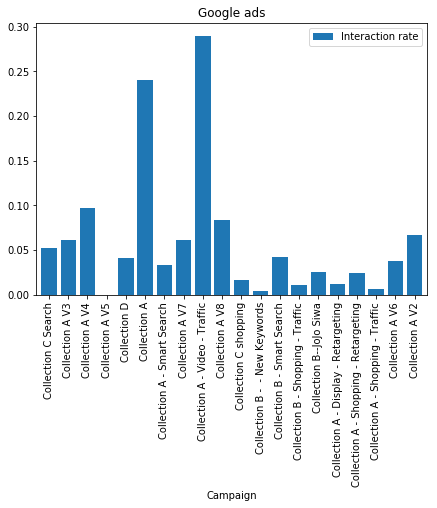

In [279]:
G_ad_last_week.plot(kind='bar',x='Campaign',y='Interaction rate',width=0.8,figsize=(7,5),
                    title='Google ads')

plt.savefig('Google Interaction Rate.jpg',bbox_inches='tight')
plt.show()
plt.close()

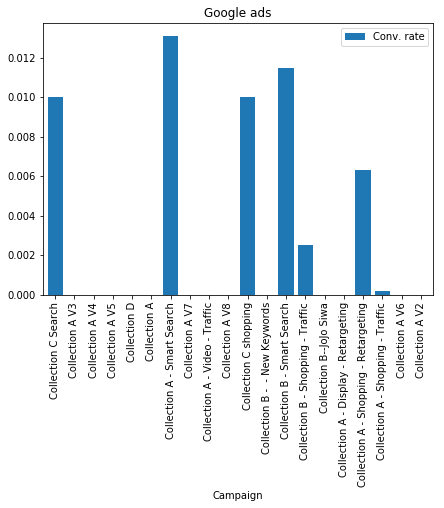

In [280]:
G_ad_last_week.plot(kind='bar',x='Campaign',y='Conv. rate',width=0.8,figsize=(7,5),
                    title='Google ads')

plt.savefig('Google Conversion Rate.jpg',bbox_inches='tight')
plt.show()
plt.close()

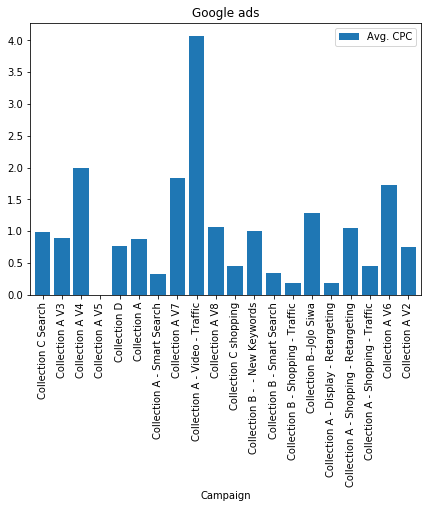

In [281]:
G_ad_last_week.plot(kind='bar',x='Campaign',y='Avg. CPC',width=0.8,figsize=(7,5),
                    title='Google ads')

plt.savefig('Google CPC.jpg',bbox_inches='tight')
plt.show()
plt.close()

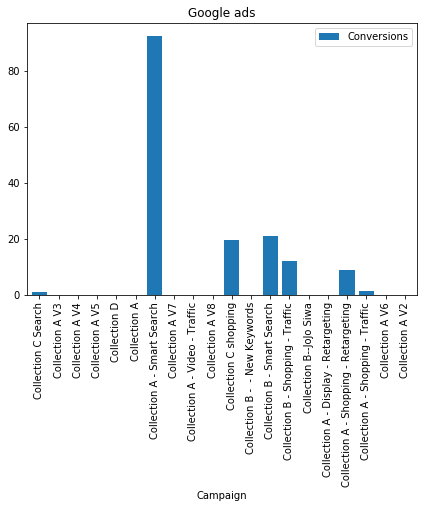

In [282]:
G_ad_last_week.plot(kind='bar',x='Campaign',y='Conversions',width=0.8,figsize=(7,5),
                    title='Google ads')

plt.savefig('Google conversion.jpg',bbox_inches='tight')
plt.show()
plt.close()

In [36]:
G_ad_total = G_ad.groupby(['Week'])['Cost','Conv. value'].sum()
G_ad_total['Google ROI'] = G_ad_total['Conv. value']/G_ad_total['Cost']
G_ad_total.tail()

,Cost,Conv. value,Google ROI
Week,,,
6/17/2019,24857.24,207282.39,8.338914
6/24/2019,26386.69,169480.39,6.422950
6/3/2019,22900.54,176530.07,7.708555
7/1/2019,26363.61,155756.06,5.907994
7/8/2019,18469.54,83450.60,4.518283


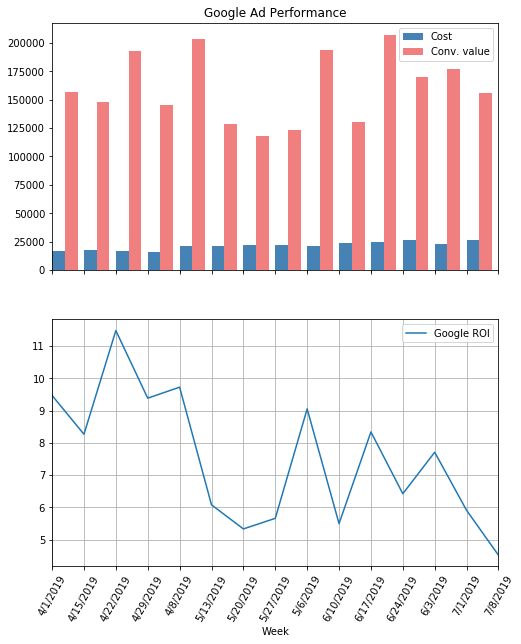

In [177]:
fig, ax = plt.subplots(2,sharex=True)
G_ad_total.plot(kind='bar',y=['Cost','Conv. value'],color=['steelblue','lightcoral'],ax=ax[0],
                position=0,width=0.8, figsize=(8,10),title='Google Ad Performance')
#G_ad_total.plot(kind='bar',y='Conv. value',ax=ax[0])
G_ad_total.plot(kind='line',y='Google ROI',ax=ax[1],rot=60,grid='on')
#plt.suptitle('Google Ad Performance')
#ax[0].grid('on', which='both', axis='y')
#ax.grid('on', which='both', axis='y')
plt.savefig('Google Ad Performance.jpg')
plt.show()
plt.close()

In [38]:
G_ad.head(1)

,Week,Campaign status,Campaign,Currency code,Budget,Budget type,Campaign type,Impr.,Interactions,Interaction rate,Cost,Conversions,Conv. value,Conv. value / cost,Conv. rate,Avg. session duration (seconds),Avg. CPC,Cost / conv.,Bid strategy type
12,4/1/2019,Enabled,Collection A V2,USD,300,Daily,Search,1368.0,54,0.0395,39.42,0.0,0.0,0.0,0.0,44,0.73,0.0,Manual CPC


In [39]:
G_ad_total_1 = G_ad.groupby(['Week','Campaign'])['Cost', 'Impr.', 'Conv. value'].sum()
#G_ad_total_1['ROI'] = G_ad_total_1['Website Purchases Conversion Value'] / FB_ad_cost['Amount Spent (USD)']
G_ad_total_1.tail()

Cost    Impr.  Conv. value
Week     Campaign                                                 
7/8/2019 Collection B - Smart Search  639.72  43650.0      8750.70
         Collection B--JoJo Siwa      921.24  28524.0         0.00
         Collection C Search          101.01   1966.0       129.99
         Collection C shopping        603.73  80605.0      5145.89
         Collection D                  27.42    870.0         0.00

In [40]:
G_ad_total_1['ROI']=G_ad_total_1['Conv. value']/G_ad_total_1['Cost']
G_ad_total_1.tail(20)

Cost      Impr.  \
Week     Campaign                                                    
7/8/2019 Collection A                             31.26      150.0   
         Collection A - Display - Retargeting    602.16   269676.0   
         Collection A - Shopping - Retargeting  1422.30    59526.0   
         Collection A - Shopping - Traffic      4240.86  1318992.0   
         Collection A - Smart Search            2263.98   215610.0   
         Collection A - Video - Traffic          902.58    39186.0   
         Collection A V2                          31.50      630.0   
         Collection A V3                         154.08     2814.0   
         Collection A V4                        1536.96     7872.0   
         Collection A V5                           0.00      828.0   
         Collection A V6                        1527.48    23412.0   
         Collection A V7                        2301.54    20184.0   
         Collection A V8                         102.66     1146.0   
         Collection B -  - New Keywords          138.72    36186.0   
         Collection B - Shopping - Traffic       920.34   445866.0   
         Collection B - Smart Search             639.72    43650.0   
         Collection B--JoJo Siwa                 921.24    28524.0   
         Collection C Search                     101.01     1966.0   
         Collection C shopping                   603.73    80605.0   
         Collection D                             27.42      870.0   

                                                Conv. value        ROI  
Week     Campaign                                                       
7/8/2019 Collection A                                  0.00   0.000000  
         Collection A - Display - Retargeting          0.00   0.000000  
         Collection A - Shopping - Retargeting      1390.50   0.977642  
         Collection A - Shopping - Traffic          1320.00   0.311258  
         Collection A - Smart Search               62069.52  27.416108  
         Collection A - Video - Traffic                0.00   0.000000  
         Collection A V2                               0.00   0.000000  
         Collection A V3                               0.00   0.000000  
         Collection A V4                               0.00   0.000000  
         Collection A V5                               0.00        NaN  
         Collection A V6                               0.00   0.000000  
         Collection A V7                               0.00   0.000000  
         Collection A V8                               0.00   0.000000  
         Collection B -  - New Keywords                0.00   0.000000  
         Collection B - Shopping - Traffic          4644.00   5.045961  
         Collection B - Smart Search                8750.70  13.678953  
         Collection B--JoJo Siwa                       0.00   0.000000  
         Collection C Search                         129.99   1.286902  
         Collection C shopping                      5145.89   8.523496  
         Collection D                                  0.00   0.000000

In [41]:
name_list = G_ad['Campaign'].unique().tolist()
name_list_A = []
for name in name_list:
    if 'Collection A' in name:
        name_list_A.append(name)
name_list_A

['Collection A V2',
 'Collection A - Shopping - Retargeting',
 'Collection A - Shopping - Traffic',
 'Collection A - Display - Retargeting',
 'Collection A V8',
 'Collection A - Video - Traffic',
 'Collection A',
 'Collection A V3',
 'Collection A - Smart Search',
 'Collection A V4',
 'Collection A V7',
 'Collection A V6',
 'Collection A V5']

In [42]:
name_list_B = []
for name in name_list:
    if 'Collection B' in name:
        name_list_B.append(name)
name_list_B

['Collection B - Smart Search',
 'Collection B--JoJo Siwa',
 'Collection B -  - New Keywords',
 'Collection B - Shopping - Traffic']

In [43]:
name_list_C = []
for name in name_list:
    if 'Collection C' in name:
        name_list_C.append(name)
name_list_C

['Collection C Search', 'Collection C shopping']

In [44]:
G_ad_A = G_ad[G_ad['Campaign'].isin(name_list_A)]
G_ad_B = G_ad[G_ad['Campaign'].isin(name_list_B)]
G_ad_C = G_ad[G_ad['Campaign'].isin(name_list_C)]

### cost on collections on Google

In [133]:
cost_G_A = G_ad_A.groupby('Week')['Cost'].sum()
cost_G_A_lw = cost_G_A.tail(1)
cost_G_A_lw = pd.DataFrame(cost_G_A_lw)
cost_G_A_lw

,Cost
Week,
7/8/2019,15117.36


In [134]:
cost_G_B = G_ad_B.groupby('Week')['Cost'].sum()
cost_G_B_lw = cost_G_B.tail(1)
cost_G_B_lw = pd.DataFrame(cost_G_B_lw)
cost_G_B_lw

,Cost
Week,
7/8/2019,2620.02


In [135]:
cost_G_C = G_ad_C.groupby('Week')['Cost'].sum()
cost_G_C_lw = cost_G_C.tail(1)
cost_G_C_lw = pd.DataFrame(cost_G_C_lw)
cost_G_C_lw

,Cost
Week,
7/8/2019,704.74


In [139]:
cost_G_remaining_lw = cost_G_lw['Cost'][0] - cost_G_A_lw['Cost'][0] - cost_G_B_lw['Cost'][0] - cost_G_C_lw['Cost'][0]
cost_G_remaining_lw


27.419999999999845

In [141]:
cost_G_ads = pd.DataFrame()
cost_G_ads = cost_G_ads.append({'Campaign Name':'Collection A','Cost':cost_G_A_lw['Cost'][0] },
                     ignore_index=True)
cost_G_ads = cost_G_ads.append({'Campaign Name':'Collection B','Cost':cost_G_B_lw['Cost'][0] },
                     ignore_index=True)
cost_G_ads = cost_G_ads.append({'Campaign Name':'Collection C','Cost':cost_G_C_lw['Cost'][0] },
                     ignore_index=True)
cost_G_ads = cost_G_ads.append({'Campaign Name':'Remaining','Cost':cost_G_remaining_lw },
                     ignore_index=True)
cost_G_ads

,Campaign Name,Cost
0,Collection A,15117.36
1,Collection B,2620.02
2,Collection C,704.74
3,Remaining,27.42


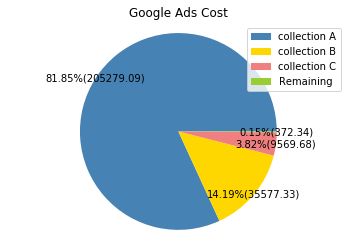

In [142]:
G_ad_pie = cost_G_ads['Cost']
labels = ['collection A','collection B','collection C','Remaining']
colors = ['steelblue','gold','lightcoral','yellowgreen']
plt.close()
#fig = plt.figure()
plt.pie(G_ad_pie,colors=colors, pctdistance=1,labeldistance=0.8,
       autopct=lambda p:'{:.2f}%({:.2f})'.format(p,(p/100)*X.sum()))
plt.title('Google Ads Cost')
plt.axis('equal')
plt.legend(labels, loc='best')
plt.savefig('Google Ads Cost.jpg')
plt.show()
plt.close()

In [45]:
last_week_Non_zero_ROI=G_ad_total_1.tail(20).loc[G_ad_total_1['ROI']>0]
last_week_Non_zero_ROI=last_week_Non_zero_ROI[['Cost','ROI']]
last_week_Non_zero_ROI

Cost        ROI
Week     Campaign                                                 
7/8/2019 Collection A - Shopping - Retargeting  1422.30   0.977642
         Collection A - Shopping - Traffic      4240.86   0.311258
         Collection A - Smart Search            2263.98  27.416108
         Collection B - Shopping - Traffic       920.34   5.045961
         Collection B - Smart Search             639.72  13.678953
         Collection C Search                     101.01   1.286902
         Collection C shopping                   603.73   8.523496

### Collection A Google Ad

In [46]:
G_ad_A_total = G_ad_A.groupby(['Week'])['Cost','Conv. value','Impr.'].sum()
G_ad_A_total['ROI Collection A'] = G_ad_A_total['Conv. value']/G_ad_A_total['Cost']
G_ad_A_total.tail()

,Cost,Conv. value,Impr.,ROI Collection A
Week,,,,
6/17/2019,20636.46,186703.26,3454644.0,9.047252
6/24/2019,21880.14,143925.78,3024144.0,6.577919
6/3/2019,18568.20,124481.76,2748846.0,6.704029
7/1/2019,21705.30,137572.68,3254226.0,6.338207
7/8/2019,15117.36,64780.02,1960026.0,4.285141


### Collection A Retargeting

In [47]:
G_ad_A_retargeting = G_ad[G_ad['Campaign']=='Collection A - Shopping - Retargeting'].groupby(['Week','Campaign'])['Cost', 'Conv. value'].sum()
G_ad_A_retargeting['Retargeting ROI']=G_ad_A_retargeting['Conv. value']/G_ad_A_retargeting['Cost']
G_ad_A_retargeting.tail(1)

,,Cost,Conv. value,Retargeting ROI
Week,Campaign,,,
7/8/2019,Collection A - Shopping - Retargeting,1422.3,1390.5,0.977642


### Collection A Traffic

In [48]:
G_ad_A_traffic = G_ad[G_ad['Campaign']=='Collection A - Shopping - Traffic'].groupby(['Week','Campaign'])['Cost', 'Conv. value'].sum()
G_ad_A_traffic['Traffic ROI']=G_ad_A_traffic['Conv. value']/G_ad_A_traffic['Cost']
G_ad_A_traffic.tail(1)

,,Cost,Conv. value,Traffic ROI
Week,Campaign,,,
7/8/2019,Collection A - Shopping - Traffic,4240.86,1320.0,0.311258


### Collection A Smart Search

In [49]:
G_ad_A_ss = G_ad[G_ad['Campaign']=='Collection A - Smart Search'].groupby(['Week','Campaign'])['Cost', 'Conv. value'].sum()
G_ad_A_ss['Smart Search ROI']=G_ad_A_ss['Conv. value']/G_ad_A_ss['Cost']
G_ad_A_ss.tail(1)

,,Cost,Conv. value,Smart Search ROI
Week,Campaign,,,
7/8/2019,Collection A - Smart Search,2263.98,62069.52,27.416108


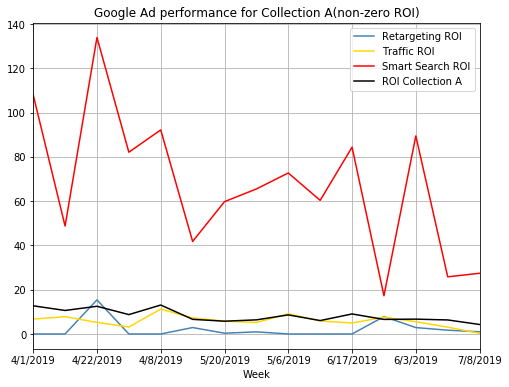

In [50]:
ax = plt.gca()
G_ad_A_retargeting.plot(kind='line',y='Retargeting ROI',color='steelblue',ax=ax,figsize=(8,6))
G_ad_A_traffic.plot(kind='line',y='Traffic ROI',color='gold',ax=ax)
G_ad_A_ss.plot(kind='line',y= 'Smart Search ROI',color='red',ax=ax,rot=60,
              title='Google Ad performance for Collection A(non-zero ROI)')
G_ad_A_total.plot(kind='line',y='ROI Collection A',color='black',ax=ax)
ax.grid('on', which='both', axis='x')
ax.grid('on', which='both', axis='y')
plt.savefig('Google Ad performance for Collection A(non-zero ROI)e.jpg')
plt.show()
plt.close()

### Collection B Google Ad

In [51]:
G_ad_B_total = G_ad_B.groupby(['Week'])['Cost','Conv. value','Impr.'].sum()
G_ad_B_total['ROI Collection B'] = G_ad_B_total['Conv. value']/G_ad_B_total['Cost']
G_ad_B_total.tail()

,Cost,Conv. value,Impr.,ROI Collection B
Week,,,,
6/17/2019,3225.96,13811.64,644886.0,4.281405
6/24/2019,3511.08,21461.10,606276.0,6.112393
6/3/2019,3429.24,47125.80,756780.0,13.742345
7/1/2019,3623.70,13868.58,688854.0,3.827188
7/8/2019,2620.02,13394.70,554226.0,5.112442


### Collection B Traffic

In [52]:
G_ad_B_traffic = G_ad[G_ad['Campaign']=='Collection B - Shopping - Traffic'].groupby(['Week','Campaign'])['Cost', 'Conv. value'].sum()
G_ad_B_traffic['Traffic ROI']=G_ad_B_traffic['Conv. value']/G_ad_B_traffic['Cost']
G_ad_B_traffic.tail(1)

,,Cost,Conv. value,Traffic ROI
Week,Campaign,,,
7/8/2019,Collection B - Shopping - Traffic,920.34,4644.0,5.045961


### Collection B Smart Search

In [53]:
G_ad_B_ss = G_ad[G_ad['Campaign']=='Collection B - Smart Search'].groupby(['Week','Campaign'])['Cost', 'Conv. value'].sum()
G_ad_B_ss['Smart Search ROI']=G_ad_B_ss['Conv. value']/G_ad_B_ss['Cost']
G_ad_B_ss.tail(1)

,,Cost,Conv. value,Smart Search ROI
Week,Campaign,,,
7/8/2019,Collection B - Smart Search,639.72,8750.7,13.678953


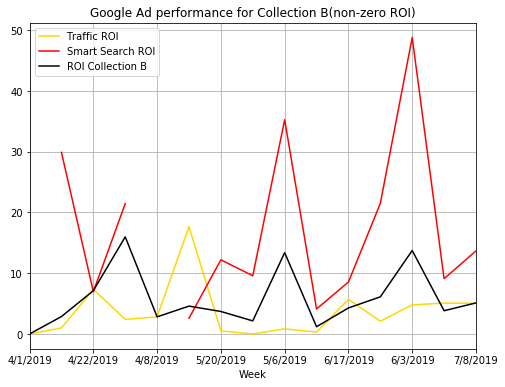

In [54]:
ax = plt.gca()
G_ad_B_traffic.plot(kind='line',y='Traffic ROI',color='gold',ax=ax,figsize=(8,6))
G_ad_B_ss.plot(kind='line',y= 'Smart Search ROI',color='red',ax=ax,rot=60,
              title='Google Ad performance for Collection B(non-zero ROI)')
G_ad_B_total.plot(kind='line',y='ROI Collection B',color='black',ax=ax)
ax.grid('on', which='both', axis='x')
ax.grid('on', which='both', axis='y')
plt.savefig('Google Ad performance for Collection B(non-zero ROI)e.jpg')
plt.show()
plt.close()

### Collection C Google Ad

In [55]:
G_ad_C_total = G_ad_C.groupby(['Week'])['Cost','Conv. value','Impr.'].sum()
G_ad_C_total['ROI Collection C'] = G_ad_C_total['Conv. value']/G_ad_C_total['Cost']
G_ad_C_total.tail()

,Cost,Conv. value,Impr.,ROI Collection C
Week,,,,
6/17/2019,934.22,6767.49,88964.0,7.244000
6/24/2019,964.63,4093.51,114803.0,4.243606
6/3/2019,867.28,4922.51,78841.0,5.675803
7/1/2019,990.09,4314.80,106049.0,4.357988
7/8/2019,704.74,5275.88,82571.0,7.486279


### Collection C Search

In [56]:
G_ad_C_s = G_ad[G_ad['Campaign']=='Collection C Search'].groupby(['Week','Campaign'])['Cost', 'Conv. value'].sum()
G_ad_C_s['Search ROI']=G_ad_C_s['Conv. value']/G_ad_C_s['Cost']
G_ad_C_s.tail(1)

,,Cost,Conv. value,Search ROI
Week,Campaign,,,
7/8/2019,Collection C Search,101.01,129.99,1.286902


### Collection C Shopping

In [57]:
G_ad_C_shopping = G_ad[G_ad['Campaign']=='Collection C shopping'].groupby(['Week','Campaign'])['Cost', 'Conv. value'].sum()
G_ad_C_shopping['Shopping ROI']=G_ad_C_shopping['Conv. value']/G_ad_C_shopping['Cost']
G_ad_C_shopping.tail(1)

,,Cost,Conv. value,Shopping ROI
Week,Campaign,,,
7/8/2019,Collection C shopping,603.73,5145.89,8.523496


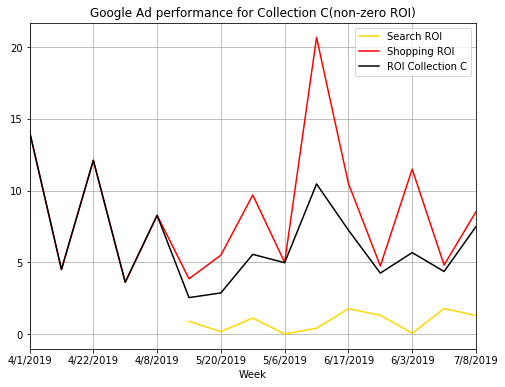

In [58]:
ax = plt.gca()
G_ad_C_s.plot(kind='line',y='Search ROI',color='gold',ax=ax,figsize=(8,6))
G_ad_C_shopping.plot(kind='line',y= 'Shopping ROI',color='red',ax=ax,rot=60,
              title='Google Ad performance for Collection C(non-zero ROI)')
G_ad_C_total.plot(kind='line',y='ROI Collection C',color='black',ax=ax)
ax.grid('on', which='both', axis='x')
ax.grid('on', which='both', axis='y')
plt.savefig('Google Ad performance for Collection C(non-zero ROI)e.jpg')
plt.show()
plt.close()

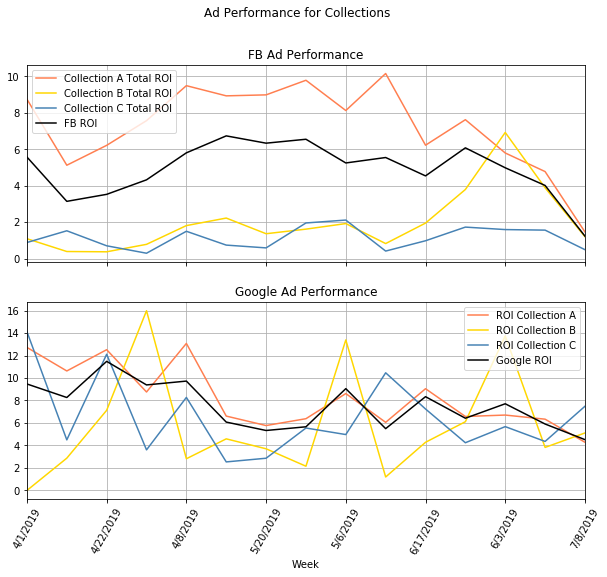

In [61]:
fig, ax = plt.subplots(2,sharex=True)
#G_ad_A_total.plot(kind='bar',y='Impr.',color='steelblue',ax=ax[0],figsize=(10,8))

FB_ad_A_total.plot(kind='line',y= 'Collection A Total ROI',ax=ax[0],color='coral',rot=60,figsize=(10,8))
FB_ad_B_total.plot(kind='line',y= 'Collection B Total ROI',ax=ax[0],color='gold',rot=60)
FB_ad_C_total.plot(kind='line',y= 'Collection C Total ROI',ax=ax[0],color='steelblue',rot=60)
FB_total_1.plot(kind='line',y='FB ROI',ax=ax[0],color='black',rot=60,grid='on',title='FB Ad Performance')

G_ad_A_total.plot(kind='line',y= 'ROI Collection A',ax=ax[1],color='coral',rot=60,figsize=(10,8))
G_ad_B_total.plot(kind='line',y= 'ROI Collection B',ax=ax[1],color='gold',rot=60)
G_ad_C_total.plot(kind='line',y= 'ROI Collection C',ax=ax[1],color='steelblue',rot=60)
G_ad_total.plot(kind='line',y='Google ROI',ax=ax[1],color='black',rot=60,grid='on',title='Google Ad Performance')
plt.suptitle('Ad Performance for Collections')
plt.savefig('Ad Performance for Collections.jpg')
plt.show()
plt.close()

## Following is visualization on Weekly Sales 

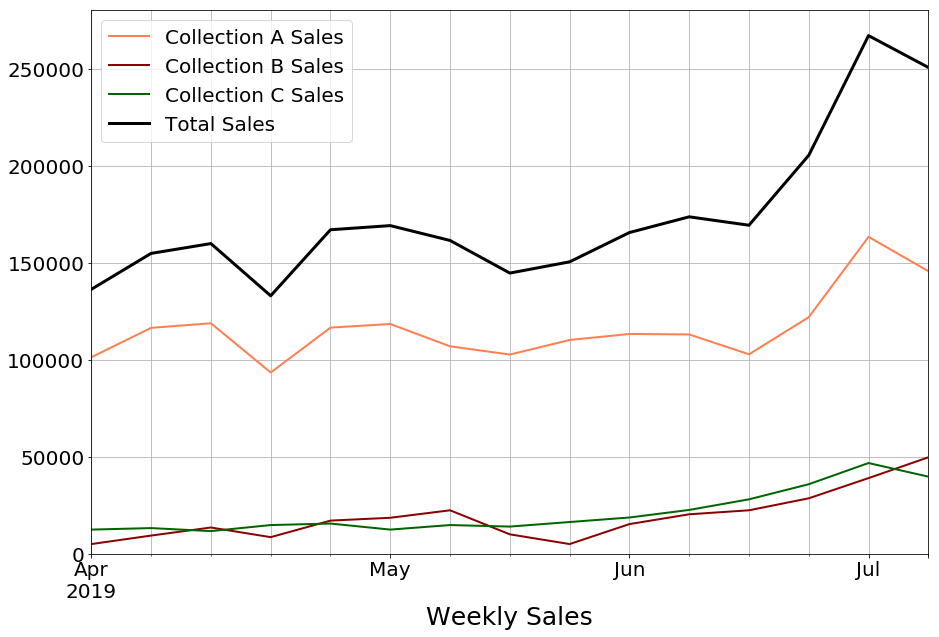

In [62]:
plt.close()
ax = plt.gca()
sales.plot(kind='line', x='Week Start', y='Collection A Sales', figsize=(15,10),
           linewidth='2', color='coral', ax=ax, fig=fig, fontsize=20)
sales.plot(kind='line', x='Week Start', y='Collection B Sales', linewidth='2', color='darkred', ax=ax, fig=fig)
sales.plot(kind='line', x='Week Start', y='Collection C Sales', linewidth='2', color='darkgreen', ax=ax, fig=fig)
sales.plot(kind='line', x='Week Start', y='Total Sales', linewidth='3', color='black', ax=ax, fig=fig)
ax.grid('on', which='both', axis='x')
ax.grid('on', which='both', axis='y')
ax.set_xlabel('Weekly Sales', fontsize=25)
ax.set_ylim(bottom=0)
plt.legend(fontsize=20)
plt.savefig('sales.jpg')
plt.show()
plt.close()

SyntaxError: invalid syntax (<ipython-input-284-f7bed61c1bb2>, line 1)